In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Understanding the Dataset

In [3]:
df.shape

(918, 12)

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
# basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# counting null values in each column of the dataframe
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# replacing 0's as 'No' & 1's as 'Yes' for "HeartDisease" column
df.HeartDisease.replace(to_replace={0: "No", 1: "Yes"}, inplace=True)
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,No


In [9]:
# replacing 0's as 'No' & 1's as 'Yes' for "FastingBS" column
df.FastingBS.replace(to_replace={0: "No", 1: "Yes"}, inplace=True)
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
348,69,M,ASY,137,0,No,ST,104,Y,1.6,Flat,Yes


In [10]:
# count values of 'Sex' column 
df.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [11]:
# count values of 'ChestPainType' column
df.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [12]:
# count values of 'FastingBS' column
df.FastingBS.value_counts()

FastingBS
No     704
Yes    214
Name: count, dtype: int64

In [13]:
# count values of 'RestingECG' column
df.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [14]:
# count values of 'ExerciseAngina' column
df.ExerciseAngina.value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [15]:
# count values of 'ST_Slope' column
df.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [16]:
# count values of 'HeartDisease' column
df.HeartDisease.value_counts()

HeartDisease
Yes    508
No     410
Name: count, dtype: int64

In [17]:
# percentage of split between the categorical values
df.HeartDisease.value_counts(normalize=True)
# About 55% of the data is about people who have heart disease (Class - 1) 
# and remaining 45% of the data is about who didn't have heart disease (Class -0)

HeartDisease
Yes    0.553377
No     0.446623
Name: proportion, dtype: float64

In [18]:
# gives a brief summary stats of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


## Data Visualization

In [19]:
from scipy import stats
from statsmodels.api import qqplot
numberical_columns = ['Age', 'RestingBP', 'Cholesterol', 
                      'MaxHR', 'Oldpeak']
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 
                       'ExerciseAngina', 'ST_Slope', 'HeartDisease']

## Feature Engineering

In [20]:
def frequency_encoding(df, var):
    encoded_feature = df[var].value_counts().to_dict()
    df[var] = df[var].map(encoded_feature)

for col in ['ChestPainType', 'RestingECG', 'ST_Slope']:
    frequency_encoding(df, col)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,173,140,289,No,552,172,N,0.0,395,No
1,49,F,203,160,180,No,552,156,N,1.0,460,Yes
2,37,M,173,130,283,No,178,98,N,0.0,395,No
3,48,F,496,138,214,No,552,108,Y,1.5,460,Yes
4,54,M,203,150,195,No,552,122,N,0.0,395,No


In [21]:
# replacing 'No' as '0' & 'Yes' as 1
df.Sex.replace(to_replace={"F": 0, "M": 1}, inplace=True)
df.FastingBS.replace(to_replace={"No": 0, "Yes": 1}, inplace=True)
df.ExerciseAngina.replace(to_replace={"N": 0, "Y": 1}, inplace=True)
df.HeartDisease.replace(to_replace={"No": 0, "Yes": 1}, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,173,140,289,0,552,172,0,0.0,395,0
1,49,0,203,160,180,0,552,156,0,1.0,460,1
2,37,1,173,130,283,0,178,98,0,0.0,395,0
3,48,0,496,138,214,0,552,108,1,1.5,460,1
4,54,1,203,150,195,0,552,122,0,0.0,395,0


## Correlation

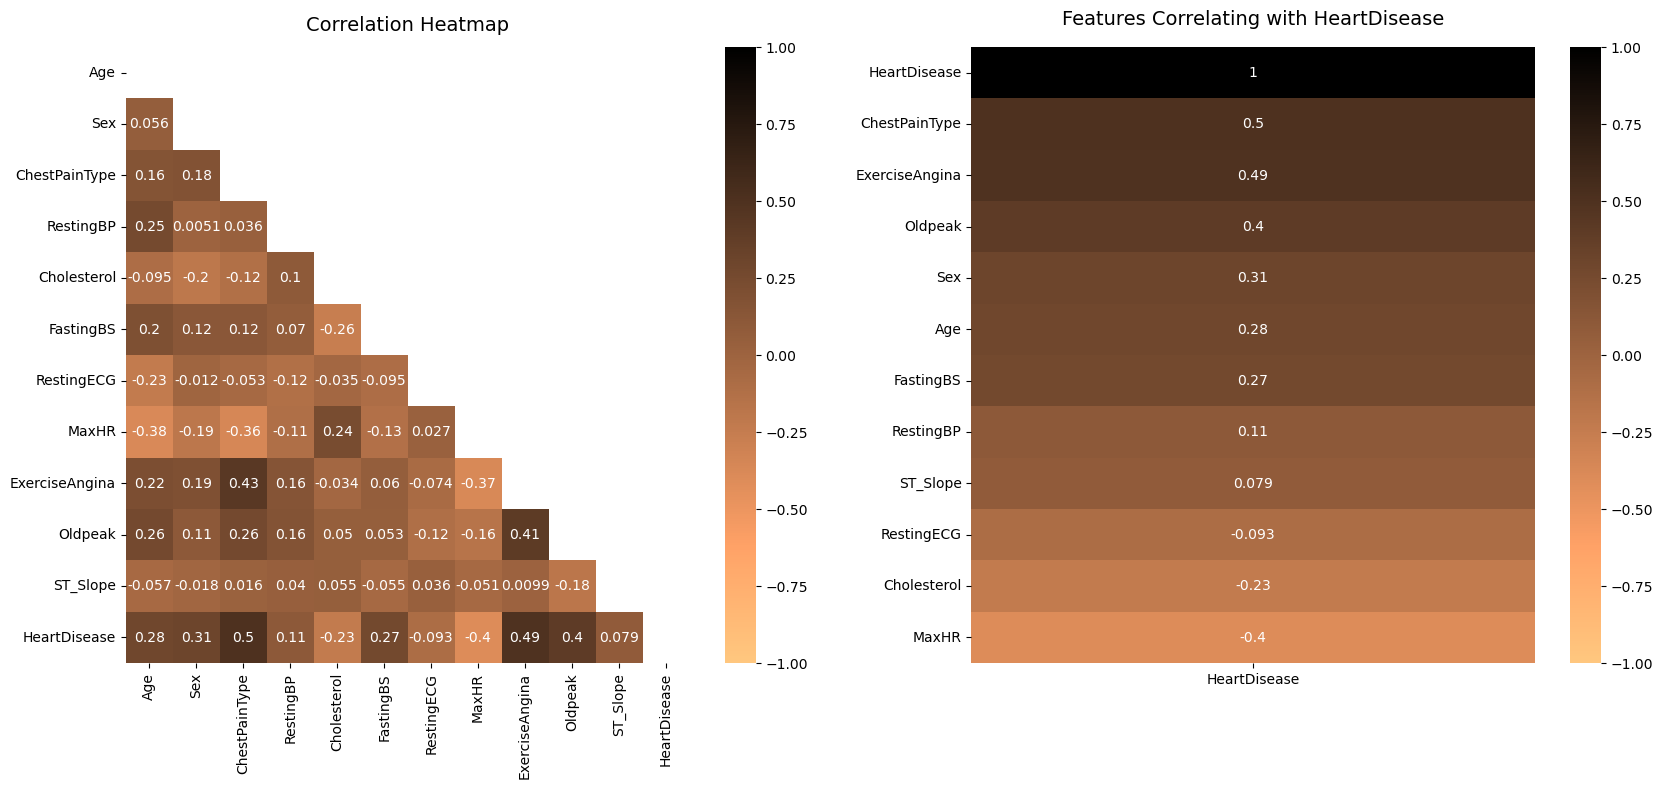

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))  # create a 1 x 2 subplot grid
resign_corr = df.corr()  # calculate correlation of the dataframe
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(
    df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap="copper_r"
)  # cornor heatmap of the dataframe correlation
cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)  # sets the title for the heatmap with font size 14 and padding 12

heatmap = sns.heatmap(
    resign_corr[["HeartDisease"]].sort_values(by="HeartDisease", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="copper_r",
)  # create heatmap for features correlating with the dependant varibale 'HeartDisease'
heatmap.set_title(
    "Features Correlating with HeartDisease",
    fontdict={"fontsize": 14},
    pad=16,  # sets the title for the heatmap with font size 14 and padding 16
)
plt.show()  # shows the subplot

## Data Splitting

In [23]:
X = df.drop(["HeartDisease"], axis=1)  # X contains all independant variables
y = df["HeartDisease"]  # Y contains only the dependant variable

In [24]:
X[:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,173,140,289,0,552,172,0,0.0,395
1,49,0,203,160,180,0,552,156,0,1.0,460
2,37,1,173,130,283,0,178,98,0,0.0,395
3,48,0,496,138,214,0,552,108,1,1.5,460
4,54,1,203,150,195,0,552,122,0,0.0,395


In [25]:
y[:5]

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

### Sampling Imbalanced Data

### Feature Selection

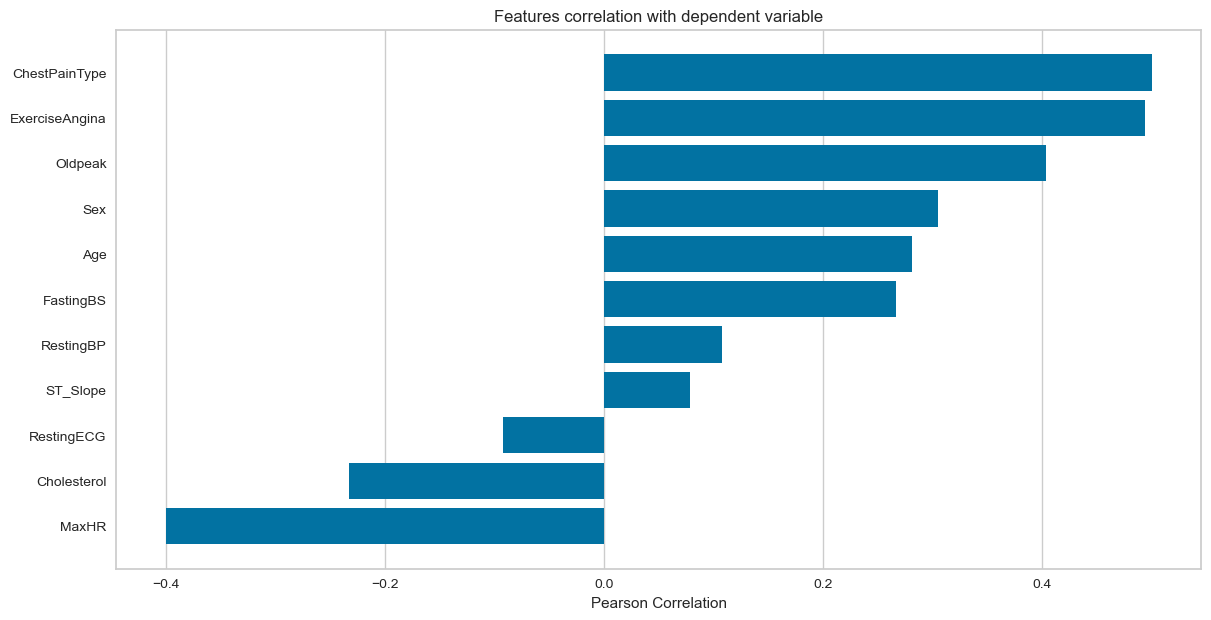

In [26]:
# displays the Features correlation with dependant variable 'HeartDisease' as a barplot using pearson correlation method
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="pearson", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()

In [27]:
X.drop(['RestingECG', 'MaxHR', 'Cholesterol'], axis=1, inplace=True)
X.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,173,140,0,0,0.0,395
1,49,0,203,160,0,0,1.0,460
2,37,1,173,130,0,0,0.0,395
3,48,0,496,138,0,1,1.5,460
4,54,1,203,150,0,0,0.0,395


In [28]:
from sklearn.model_selection import train_test_split

# splitting X and Y as train & test sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Fitting

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

In [30]:
# fitting the random forest model
rf_clf = RandomForestClassifier(n_estimators=20, random_state=0).fit(X_train, y_train)

In [31]:
y_pred = rf_clf.predict(X_test)

**Classification Accuracy:**

In [32]:
print(accuracy_score(y_test, y_pred))

0.8478260869565217


**Classification Error:**

In [33]:
print(1 - accuracy_score(y_test, y_pred))

0.15217391304347827


**Sensitivity/True Positive Rate/Recall Score**

In [34]:
print(recall_score(y_test, y_pred))

0.8317757009345794


**Precision Score:**

In [35]:
print(precision_score(y_test, y_pred))

0.898989898989899


**F1 Score**

In [36]:
print(f1_score(y_test, y_pred))

0.8640776699029127


### Predictions

In [40]:
# function to predict using the trained model
def predict_heartdisease(
    Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope
):
    Sex = 1 if Sex == "Male" else 0
    FastingBS = 1 if FastingBS == "Yes" else 0
    ExerciseAngina = 1 if ExerciseAngina == "Yes" else 0
    if ChestPainType == "ASY":
        ChestPainType = 496
    elif ChestPainType == "NAP":
        ChestPainType = 203
    elif ChestPainType == "ATA":
        ChestPainType = 173
    else:
        ChestPainType = 46
    if ST_Slope == "Flat":
        ST_Slope = 460
    elif ST_Slope == "Up":
        ST_Slope = 395
    else:
        ST_Slope = 63
    x = [[Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope]]
    return rf_clf.predict(x)

In [41]:
# Prediction 1
# Input sequence: Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope
prediction = predict_heartdisease(37, "Male", "ASY", 130, "Yes", "Yes", 1.0, "Up")[0]
print("Oops! You have Heart Disease." if prediction else "Great! You don't have Heart Disease.")

Oops! You have Heart Disease.


In [42]:
# Prediction 2
# Input sequence: Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope
prediction = predict_heartdisease(37, "Feale", "NAP", 110, "Yes", "Yes", 1.0, "Up")[0]
print("Oops! You have Heart Disease." if prediction else "Great! You don't have Heart Disease.")

Great! You don't have Heart Disease.


### Saving the Model

In [43]:
import os
import joblib

if not os.path.exists("../models/"):
    os.mkdir("../models/")
# dump trained model as pickle file
joblib.dump(rf_clf, "../models/model.pkl")
print("Successfully Completed !")

Successfully Completed !
